In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

In [2]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


# Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
#assigning the data
temps=data.sf_temps()

In [4]:
#checking dtypes
temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
#setting datetime to index
temps=temps.set_index('date')
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Text(0.5, 1.0, 'Average Temperature')

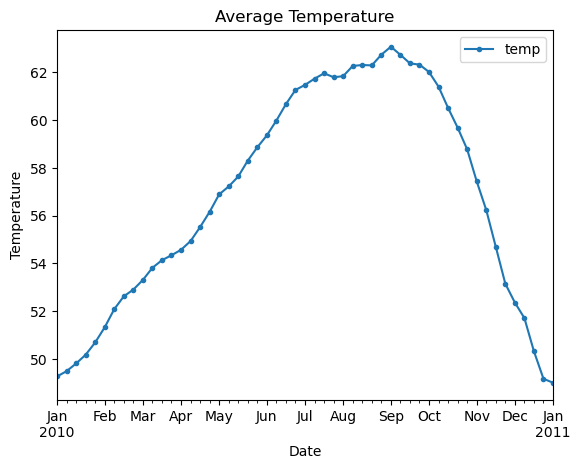

In [6]:
#plotting average temp per week
temps.resample('W').mean().plot(marker='.')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Average Temperature')

# Write the code necessary to visualize the minimum temperature over time.

Text(0.5, 1.0, 'Minimum Temperature')

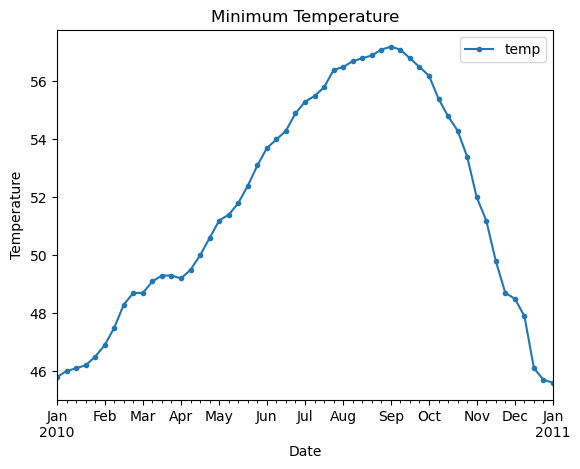

In [7]:
#plotting min temp per week
temps.resample('W').min().plot(marker='.')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Minimum Temperature')

# Write the code necessary to visualize the maximum temperature over time.

Text(0.5, 1.0, 'Maximum Temperature')

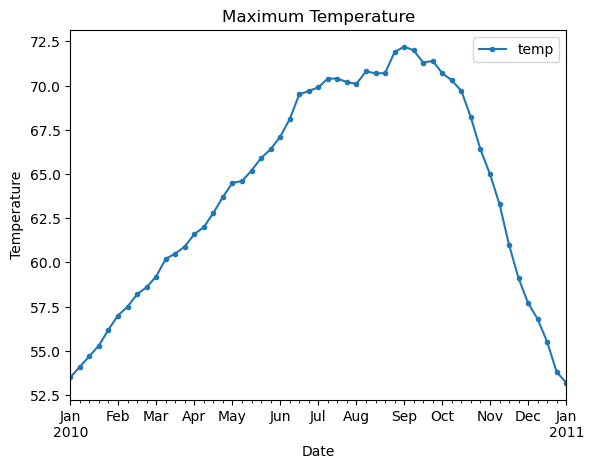

In [8]:
#plotting max temp per week
temps.resample('W').max().plot(marker='.')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Maximum Temperature')

# Which month is the coldest, on average?

In [9]:
print(temps.resample('M').mean().idxmin())
print(temps.resample('M').mean().min())

temp   2010-01-31
dtype: datetime64[ns]
temp    49.98414
dtype: float64


In [10]:
temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


# Which month has the highest average temperature?

In [11]:
print(temps.resample('M').mean().idxmax())
print(temps.resample('M').mean().max())

temp   2010-09-30
dtype: datetime64[ns]
temp    62.487083
dtype: float64


# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
temps['minimum']=temps['temp'].resample('D').min()

In [13]:
temps['maximum']=temps['temp'].resample('D').max()

In [14]:
temps

,temp,minimum,maximum
date,,,
2010-01-01 00:00:00,47.8,45.8,53.3
2010-01-01 01:00:00,47.4,NaN,NaN
2010-01-01 02:00:00,46.9,NaN,NaN
2010-01-01 03:00:00,46.5,NaN,NaN
2010-01-01 04:00:00,46.0,NaN,NaN
...,...,...,...
2010-12-31 19:00:00,50.4,NaN,NaN
2010-12-31 20:00:00,49.9,NaN,NaN
2010-12-31 21:00:00,49.4,NaN,NaN


In [15]:
(temps['maximum']-temps['minimum']).resample('M').max().sort_values(ascending=False)

date
2010-08-31    15.0
2010-09-30    14.9
2010-06-30    14.8
2010-07-31    14.8
2010-10-31    14.4
2010-05-31    13.1
2010-04-30    13.0
2010-03-31    12.0
2010-11-30    11.8
2010-02-28     9.9
2010-01-31     9.3
2010-12-31     8.9
dtype: float64

# Which year and month combination has the highest amount of precipitation?

In [16]:
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [17]:
sea=data.seattle_weather()

In [18]:
sea=sea.set_index('date')

In [19]:
pd.DataFrame(sea['precipitation'].resample('Y').max().resample('M').max().sort_values(ascending=False).head(4))

,precipitation
date,
2015-12-31,55.9
2012-12-31,54.1
2014-12-31,46.7
2013-12-31,43.4


# Visualize the amount of monthly precipitation over time.

Text(0.5, 1.0, 'Monthly Precipitation')

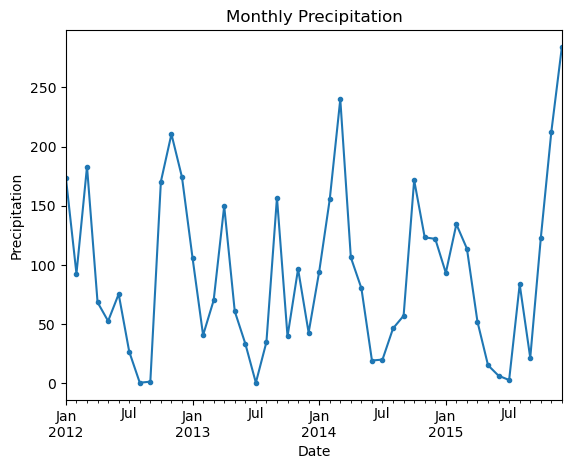

In [20]:
sea['precipitation'].resample('M').sum().plot(marker='.')
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.title('Monthly Precipitation')

# Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Text(0.5, 1.0, 'Monthly Cumulative Wind')

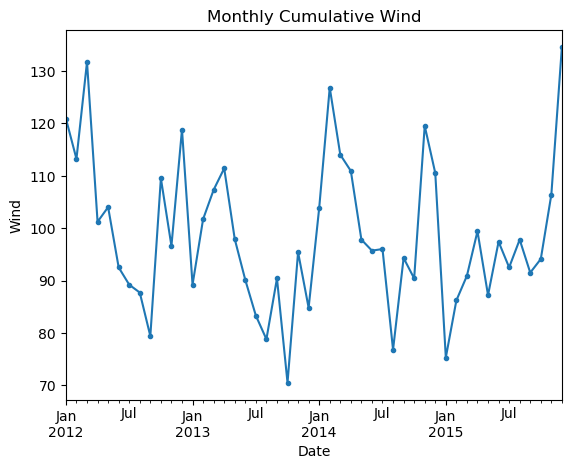

In [21]:
sea['wind'].resample('M').sum().plot(marker='.')
plt.ylabel('Wind')
plt.xlabel('Date')
plt.title('Monthly Cumulative Wind')

# Which year-month combination is the windiest?

In [22]:
pd.DataFrame(sea['wind'].resample('Y').max().resample('M').max().sort_values(ascending=False).head(4))

,wind
date,
2012-12-31,9.5
2013-12-31,8.8
2014-12-31,8.8
2015-12-31,8.0


# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [23]:
pd.DataFrame(sea[sea['weather']=='sun'].resample('Y')['weather'].count().sort_values(ascending=False))

,weather
date,
2014-12-31,211
2013-12-31,205
2015-12-31,180
2012-12-31,118


# In which month does it rain the most?

In [24]:
pd.DataFrame(sea['precipitation'].resample('M').sum().sort_values(ascending=False)).head()

,precipitation
date,
2015-12-31,284.5
2014-03-31,240.0
2015-11-30,212.6
2012-11-30,210.5
2012-03-31,183.0


# Which month has the most number of days with a non-zero amount of precipitation?

In [25]:
pd.DataFrame(sea[sea['precipitation']!=0].resample('M').count()['precipitation'].sort_values(ascending=False)).head()


,precipitation
date,
2012-12-31,27
2015-12-31,25
2012-01-31,22
2012-03-31,22
2015-11-30,20


# Convert any negative delays to 0.

In [27]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [29]:
fly=data.flights_20k()
fly=fly.set_index('date')

In [30]:
for i in fly['delay']:
    if i < 0:
        fly=fly.replace(i,0)

In [31]:
fly

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


# Which hour of the day has the highest average delay?

In [32]:
pd.DataFrame(fly['delay'].resample('1H').sum().sort_values(ascending=False)).head(1)

,delay
date,
2001-01-12 19:00:00,1056


# Does the day of the week make a difference in the delay amount?

Text(0.5, 1.0, 'Delays by Day')

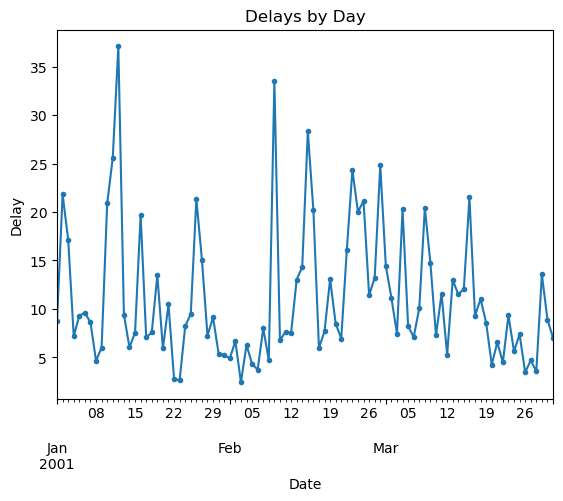

In [40]:
fly['delay'].resample('D').mean().plot(marker='.')
plt.ylabel('Delay')
plt.xlabel('Date')
plt.title('Delays by Day')

In [35]:
#yes, day matters. If it didn't the line would be flat.

# Does the month make a difference in the delay amount?

Text(0.5, 1.0, 'Delays by Month')

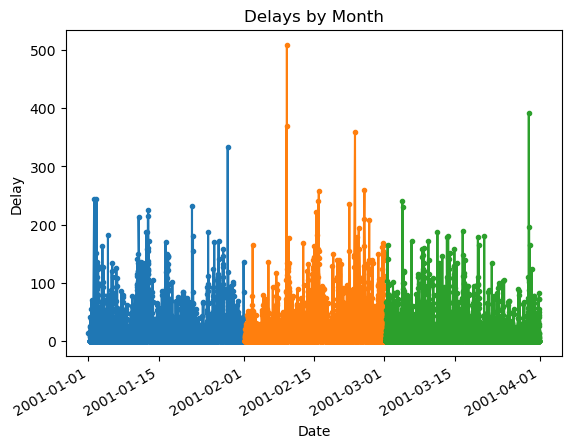

In [42]:
fly['delay'].resample('M').plot(marker='.')
plt.ylabel('Delay')
plt.xlabel('Date')
plt.title('Delays by Month')

In [50]:
#With the high variance, it is likely that month does not effect delay